In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('election2024.csv')
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [ ]:
df.shape

(1600, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [ ]:
df.isna().sum()

,0
id,0
sex,0
age,0
federal_district,0
type_of_city,0
knows_election_date,0
will_vote,0
candidate,0
television_usage,0
internet_usage,0


In [ ]:
# Null values weightage
[df.isna().sum() / len(df['education'])] * 100

In [ ]:
df.drop('company_type', axis=1, inplace=True)
df.drop('job_type', axis=1, inplace=True)
df.sample(5)

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
796,0716b1bbfacceea8,female,69.0,central,city with population of 1 million and higher,named correct date,definitely yes,Putin,over 4 hours a day,several times a week,college,medium,unemployed pensioner,0.773063
1503,0716ba7e52cce50c,female,60.0,central,city with population of less than 50k,not sure or no answer,definitely yes,Putin,does not watch,over 4 hours a day,college,low,unemployed pensioner,0.770806
1402,071691c48b0ce33b,male,22.0,central,city with population of 1 million and higher,not sure or no answer,definitely no,struggle to answer,does not watch,does not use internet,bachelor degree,low,self-employed,2.031603
361,071698ba6b4ce6e3,male,61.0,northwestern,city with population of 1 million and higher,named correct date,definitely yes,Putin,less than 4 hours a day,over 4 hours a day,bachelor degree,high,work for hire,1.732230
259,07167a5eb44ce842,male,37.0,volga,city with population of 500-950k,not sure or no answer,definitely no,will not take part,does not watch,over 4 hours a day,no school education,high,self-employed,0.520516


In [ ]:
df.isna().sum()

,0
id,0
sex,0
age,0
federal_district,0
type_of_city,0
knows_election_date,0
will_vote,0
candidate,0
television_usage,0
internet_usage,0


In [ ]:
df.sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
df.sex = df.sex.apply(lambda x: 1 if x == 'male' else 0)
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,07169ed8148ce047,1,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,1.445172
1,0716a4f3354cecdd,1,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,1.445172
2,0716889b304ce79c,1,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,1.301691
3,07168e28b5cce563,1,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,1.538628
4,0716a563914ce549,1,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,1.967015


In [ ]:
df.federal_district.unique()

array(['north caucasian', 'volga', 'northwestern', 'southern', 'central',
       'ural', 'siberian', 'far eastern'], dtype=object)

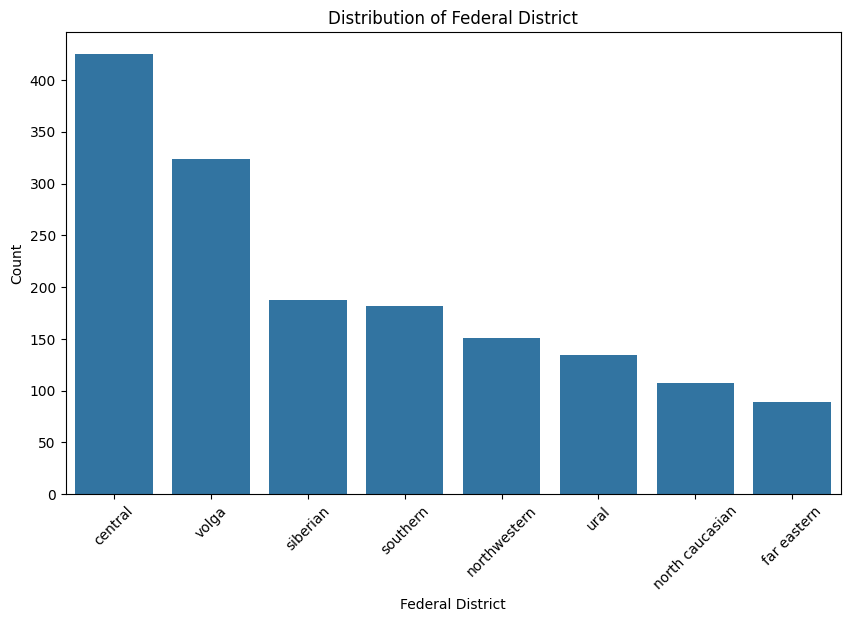

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='federal_district', data=df, order=df['federal_district'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Federal District')
plt.xlabel('Federal District')
plt.ylabel('Count')
plt.show()

In [ ]:
d = { 'north caucasian':1, 'volga':2, 'northwestern':3, 'southern':4, 'central':5,'ural':6, 'siberian':7, 'far eastern':8}
df.federal_district = df.federal_district.map(d)
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,07169ed8148ce047,1,18.0,1,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,1.445172
1,0716a4f3354cecdd,1,23.0,1,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,1.445172
2,0716889b304ce79c,1,20.0,2,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,1.301691
3,07168e28b5cce563,1,22.0,3,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,1.538628
4,0716a563914ce549,1,21.0,4,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,1.967015


In [ ]:
df.type_of_city.unique()

array(['village', 'city with population of less than 50k',
       'city with population of 1 million and higher',
       'city with population of 50-100k',
       'city with population of 100-500k', 'settlement',
       'city with population of 500-950k'], dtype=object)

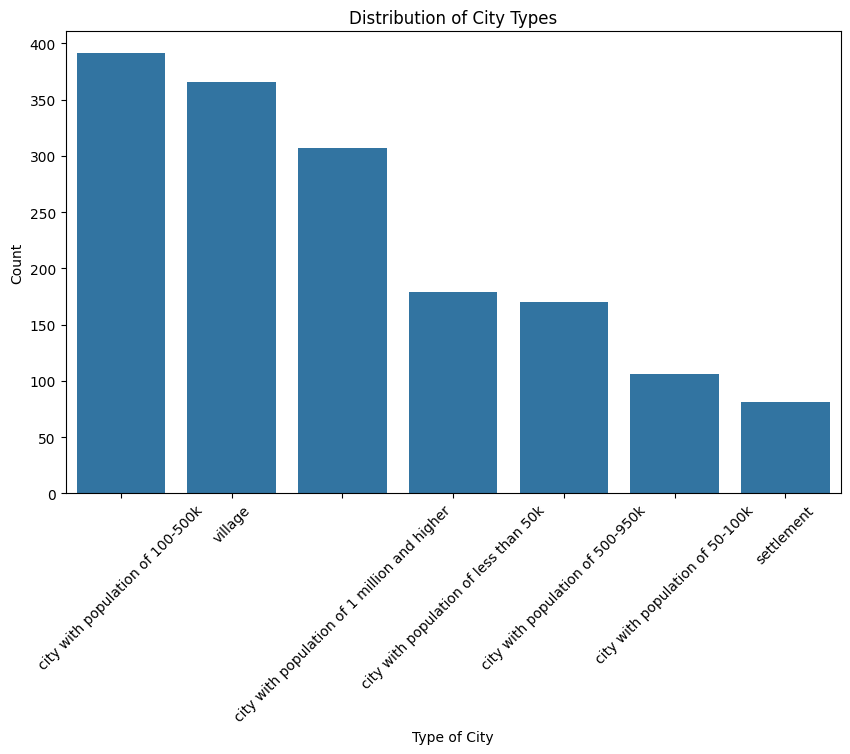

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type_of_city', data=df, order=df['type_of_city'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of City Types')
plt.xlabel('Type of City')
plt.ylabel('Count')
plt.show()

In [ ]:
c = {'village':0,
     'city with population of less than 50k':1,
     'city with population of 1 million and higher':2,
     'city with population of 50-100k':3,
     'city with population of 100-500k':4,
     'settlement':5,'city with population of 500-950k':5}
df.type_of_city = df.type_of_city.map(c)
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,07169ed8148ce047,1,18.0,1,0,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,1.445172
1,0716a4f3354cecdd,1,23.0,1,0,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,1.445172
2,0716889b304ce79c,1,20.0,2,1,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,1.301691
3,07168e28b5cce563,1,22.0,3,2,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,1.538628
4,0716a563914ce549,1,21.0,4,2,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,1.967015


In [ ]:
df.knows_election_date.unique()

array(['named correct date', 'not sure or no answer', 'wrong answer',
       'named correct year'], dtype=object)

In [ ]:
k = {'named correct date':0, 'not sure or no answer':2, 'wrong answer':4,'named correct year':6}
df.knows_election_date = df.knows_election_date.map(k)
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,07169ed8148ce047,1,18.0,1,0,0,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,1.445172
1,0716a4f3354cecdd,1,23.0,1,0,0,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,1.445172
2,0716889b304ce79c,1,20.0,2,1,0,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,1.301691
3,07168e28b5cce563,1,22.0,3,2,2,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,1.538628
4,0716a563914ce549,1,21.0,4,2,0,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,1.967015


In [ ]:
df.will_vote.unique()

array(['not sure', 'definitely yes', 'likely no', 'definitely no',
       'likely yes', 'struggle to answer'], dtype=object)

In [ ]:
n = {'not sure':0, 'definitely yes':1, 'likely no':2, 'definitely no':3,
       'likely yes':4, 'struggle to answer':5}
df.will_vote = df.will_vote.map(n)
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,07169ed8148ce047,1,18.0,1,0,0,0,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,1.445172
1,0716a4f3354cecdd,1,23.0,1,0,0,0,Putin,once half a year,over 4 hours a day,college,very high,work for hire,1.445172
2,0716889b304ce79c,1,20.0,2,1,0,1,Putin,several times a week,over 4 hours a day,college,very high,work for hire,1.301691
3,07168e28b5cce563,1,22.0,3,2,2,0,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,1.538628
4,0716a563914ce549,1,21.0,4,2,0,1,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,1.967015


In [ ]:
df.candidate.value_counts()

,count
candidate,
Putin,1128
struggle to answer,164
will not take part,96
Davankov,67
Kharitonov,63
Slutskiy,55
spoilt vote,27


In [ ]:
df.candidate.unique()

array(['Putin', 'Davankov', 'will not take part', 'spoilt vote',
       'Kharitonov', 'struggle to answer', 'Slutskiy'], dtype=object)

In [ ]:
l = {'Putin':0,
     'Davankov':1,
     'will not take part':2,
     'spoilt vote':3,
     'Kharitonov':4,
     'struggle to answer':5,
     'Slutskiy':6}

df.candidate = df.candidate.map(l)
df.head()


,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,07169ed8148ce047,1,18.0,1,0,0,0,0,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,1.445172
1,0716a4f3354cecdd,1,23.0,1,0,0,0,0,once half a year,over 4 hours a day,college,very high,work for hire,1.445172
2,0716889b304ce79c,1,20.0,2,1,0,1,0,several times a week,over 4 hours a day,college,very high,work for hire,1.301691
3,07168e28b5cce563,1,22.0,3,2,2,0,1,several times a week,over 4 hours a day,college,very high,unemployed,1.538628
4,0716a563914ce549,1,21.0,4,2,0,1,0,does not watch,over 4 hours a day,bachelor degree,very high,employed student,1.967015


In [ ]:
df.television_usage.value_counts()

,count
television_usage,
less than 4 hours a day,490
over 4 hours a day,436
does not watch,332
several times a week,204
several times a month,76
once half a year,62


In [ ]:
df.television_usage.unique()

array(['several times a week', 'once half a year', 'does not watch',
       'less than 4 hours a day', 'over 4 hours a day',
       'several times a month'], dtype=object)

In [ ]:
o = {'several times a week':0,
     'once half a year':1,
     'does not watch':2,
     'less than 4 hours a day':3,
     'over 4 hours a day':4,
     'several times a month':5}

df.television_usage = df.television_usage.map(o)
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,07169ed8148ce047,1,18.0,1,0,0,0,0,0,over 4 hours a day,incomplete school education,very high,entrepreneur,1.445172
1,0716a4f3354cecdd,1,23.0,1,0,0,0,0,1,over 4 hours a day,college,very high,work for hire,1.445172
2,0716889b304ce79c,1,20.0,2,1,0,1,0,0,over 4 hours a day,college,very high,work for hire,1.301691
3,07168e28b5cce563,1,22.0,3,2,2,0,1,0,over 4 hours a day,college,very high,unemployed,1.538628
4,0716a563914ce549,1,21.0,4,2,0,1,0,2,over 4 hours a day,bachelor degree,very high,employed student,1.967015


In [ ]:
df.internet_usage.value_counts()

,count
internet_usage,
less than 4 hours a day,613
over 4 hours a day,576
does not use internet,259
several times a week,107
several times a month,27
once half a year,18


In [ ]:
df.internet_usage.unique()

array(['over 4 hours a day', 'less than 4 hours a day',
       'several times a week', 'does not use internet',
       'several times a month', 'once half a year'], dtype=object)

In [ ]:
p = {'over 4 hours a day':0,
     'less than 4 hours a day':1,
     'several times a week':2,
     'does not use internet':3,
     'several times a month':4,
     'once half a year':5}

df.internet_usage = df.internet_usage.map(p)
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,07169ed8148ce047,1,18.0,1,0,0,0,0,0,0,incomplete school education,very high,entrepreneur,1.445172
1,0716a4f3354cecdd,1,23.0,1,0,0,0,0,1,0,college,very high,work for hire,1.445172
2,0716889b304ce79c,1,20.0,2,1,0,1,0,0,0,college,very high,work for hire,1.301691
3,07168e28b5cce563,1,22.0,3,2,2,0,1,0,0,college,very high,unemployed,1.538628
4,0716a563914ce549,1,21.0,4,2,0,1,0,2,0,bachelor degree,very high,employed student,1.967015


In [ ]:
df.education.unique()

array(['incomplete school education', 'college', 'bachelor degree',
       'school', 'academic degree', 'no school education'], dtype=object)

In [ ]:
q = {'incomplete school education':0,
     'college':1, 'bachelor degree':2,
     'school':3,
     'academic degree':4,
     'no school education':5}

df.education = df.education.map(q)
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,07169ed8148ce047,1,18.0,1,0,0,0,0,0,0,0,very high,entrepreneur,1.445172
1,0716a4f3354cecdd,1,23.0,1,0,0,0,0,1,0,1,very high,work for hire,1.445172
2,0716889b304ce79c,1,20.0,2,1,0,1,0,0,0,1,very high,work for hire,1.301691
3,07168e28b5cce563,1,22.0,3,2,2,0,1,0,0,1,very high,unemployed,1.538628
4,0716a563914ce549,1,21.0,4,2,0,1,0,2,0,2,very high,employed student,1.967015


In [ ]:
df.income.unique()

array(['very high', 'high', 'medium', 'low', 'very low', 'hard to say'],
      dtype=object)

In [ ]:
df.income.value_counts()

,count
income,
medium,949
high,405
low,149
very high,48
very low,34
hard to say,15


In [ ]:
w = {'very high':0, 'high':1, 'medium':2, 'low':3, 'very low':4, 'hard to say':5}
df.income = df.income.map(w)
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,07169ed8148ce047,1,18.0,1,0,0,0,0,0,0,0,0,entrepreneur,1.445172
1,0716a4f3354cecdd,1,23.0,1,0,0,0,0,1,0,1,0,work for hire,1.445172
2,0716889b304ce79c,1,20.0,2,1,0,1,0,0,0,1,0,work for hire,1.301691
3,07168e28b5cce563,1,22.0,3,2,2,0,1,0,0,1,0,unemployed,1.538628
4,0716a563914ce549,1,21.0,4,2,0,1,0,2,0,2,0,employed student,1.967015


In [ ]:
df.employment.unique()

array(['entrepreneur', 'work for hire', 'unemployed', 'employed student',
       'self-employed', 'unemployed pensioner', 'employed pensioner',
       'unemployed student', 'parental leave', 'hard to say',
       'refused to answer'], dtype=object)

In [ ]:
df.employment.value_counts()

,count
employment,
work for hire,535
unemployed pensioner,502
self-employed,122
employed pensioner,120
unemployed,101
entrepreneur,87
parental leave,44
employed student,37
unemployed student,27


In [ ]:
z = {'entrepreneur':0, 'work for hire':1, 'unemployed':2, 'employed student':3,
       'self-employed':4, 'unemployed pensioner':5, 'employed pensioner':6,
       'unemployed student':7, 'parental leave':8, 'hard to say':9,
       'refused to answer':10}

df.employment = df.employment.map(z)
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,07169ed8148ce047,1,18.0,1,0,0,0,0,0,0,0,0,0,1.445172
1,0716a4f3354cecdd,1,23.0,1,0,0,0,0,1,0,1,0,1,1.445172
2,0716889b304ce79c,1,20.0,2,1,0,1,0,0,0,1,0,1,1.301691
3,07168e28b5cce563,1,22.0,3,2,2,0,1,0,0,1,0,2,1.538628
4,0716a563914ce549,1,21.0,4,2,0,1,0,2,0,2,0,3,1.967015


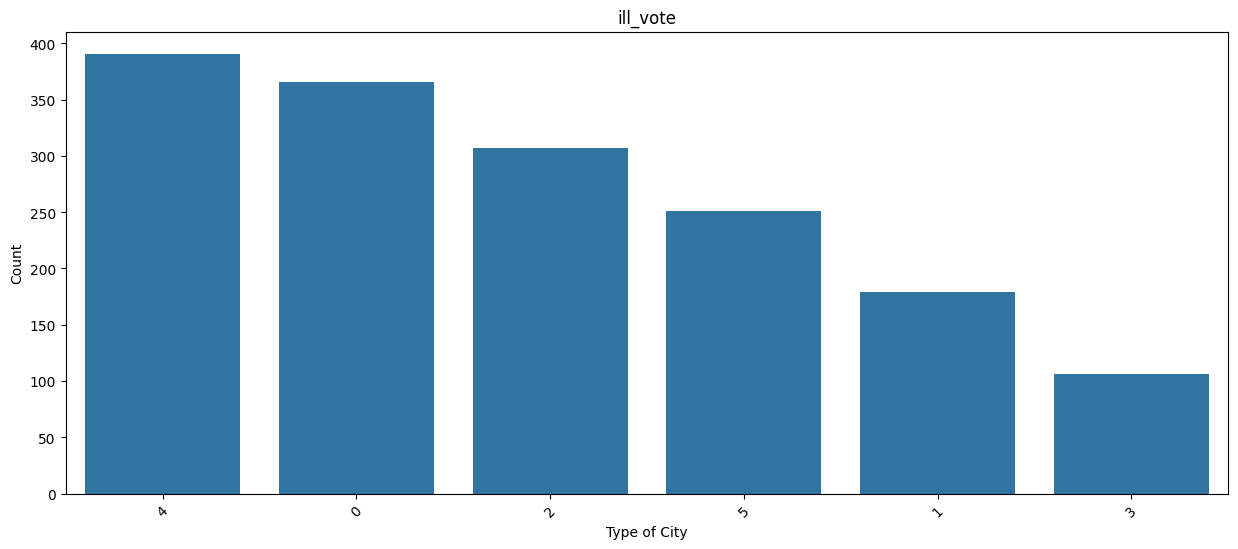

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='type_of_city', data=df, order=df['type_of_city'].value_counts().index)
plt.xticks(rotation=45)
plt.title('ill_vote')
plt.xlabel('Type of City')
plt.ylabel('Count')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   int64  
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   int64  
 4   type_of_city         1600 non-null   int64  
 5   knows_election_date  1600 non-null   int64  
 6   will_vote            1600 non-null   int64  
 7   candidate            1600 non-null   int64  
 8   television_usage     1600 non-null   int64  
 9   internet_usage       1600 non-null   int64  
 10  education            1600 non-null   int64  
 11  income               1600 non-null   int64  
 12  employment           1600 non-null   int64  
 13  weight1              1600 non-null   float64
dtypes: float64(2), int64(11), object(1)
memory usage: 175.1+ KB


In [ ]:
df.isna().sum()

,0
id,0
sex,0
age,0
federal_district,0
type_of_city,0
knows_election_date,0
will_vote,0
candidate,0
television_usage,0
internet_usage,0


In [ ]:
df.describe()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.473125,49.936250,4.308125,2.456250,0.460000,1.479375,1.088750,2.700000,1.126250,1.708125,1.850625,3.334375,1.000000
std,0.499433,16.901797,1.990455,1.810078,1.276487,1.216758,1.918508,1.372471,1.179483,0.959041,0.783387,2.309145,0.327084
min,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.468226
25%,0.000000,37.000000,2.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.772224
50%,0.000000,49.000000,5.000000,2.000000,0.000000,1.000000,0.000000,3.000000,1.000000,2.000000,2.000000,4.000000,0.921724
75%,1.000000,64.000000,6.000000,4.000000,0.000000,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000,5.000000,1.158913
max,1.000000,90.000000,8.000000,5.000000,6.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,10.000000,2.515072


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.drop('id', axis=1, inplace=True)
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,1.055275,-1.890109,-1.662514,-1.357410,-0.360477,-1.216214,-0.567676,-1.967869,-0.955166,-1.781634,-2.363076,-1.444438,1.361458
1,1.055275,-1.594190,-1.662514,-1.357410,-0.360477,-1.216214,-0.567676,-1.239029,-0.955166,-0.738599,-2.363076,-1.011242,1.361458
2,1.055275,-1.771741,-1.159959,-0.804775,-0.360477,-0.394100,-0.567676,-1.967869,-0.955166,-0.738599,-2.363076,-1.011242,0.922652
3,1.055275,-1.653374,-0.657405,-0.252140,1.206814,-1.216214,-0.046274,-1.967869,-0.955166,-0.738599,-2.363076,-0.578046,1.647273
4,1.055275,-1.712557,-0.154850,-0.252140,-0.360477,-0.394100,-0.567676,-0.510188,-0.955166,0.304436,-2.363076,-0.144850,2.957396
